Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 0.181276336
Epoch: 0002 cost= 0.149965540
Epoch: 0003 cost= 0.135607958
Epoch: 0004 cost= 0.131481126
Epoch: 0005 cost= 0.126307189
Epoch: 0006 cost= 0.124139711
Epoch: 0007 cost= 0.116604030
Epoch: 0008 cost= 0.111231647
Epoch: 0009 cost= 0.110012181
Epoch: 0010 cost= 0.107758500
Epoch: 0011 cost= 0.106357440
Epoch: 0012 cost= 0.104032613
Epoch: 0013 cost= 0.101500861
Epoch: 0014 cost= 0.103803128
Epoch: 0015 cost= 0.101583712
Epoch: 0016 cost= 0.099115074
Epoch: 0017 cost= 0.098840818
Epoch: 0018 cost= 0.096329786
Epoch: 0019 cost= 0.097874269
Epoch: 0020 cost= 0.096559271
Epoch: 0021 cost= 0.093494214
Epoch: 0022 cost= 0.094538376
Epoch: 0023 cost= 0.094740011
Epoch: 0024 cost= 0.093392946
Epoch: 0025 cost= 0.089102894
Epoch: 0026 cost= 0.090275489
Epoch: 0027 cost= 0.086929

/Users/chaeujeong/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Softmax Classifier Optimization Finished!
Accuracy(before fine-tuning): 
0.8745
Epoch: 0001 cost= 0.401184261
Epoch: 0002 cost= 0.427681565
Epoch: 0003 cost= 0.309965789
Epoch: 0004 cost= 0.397665143
Epoch: 0005 cost= 0.302372396
Epoch: 0006 cost= 0.316201687
Epoch: 0007 cost= 0.320208460
Epoch: 0008 cost= 0.379185915
Epoch: 0009 cost= 0.321488887
Epoch: 0010 cost= 0.292258412
Epoch: 0011 cost= 0.261738122
Epoch: 0012 cost= 0.277245730
Epoch: 0013 cost= 0.281007469
Epoch: 0014 cost= 0.309017599
Epoch: 0015 cost= 0.366899163
Epoch: 0016 cost= 0.261282504
Epoch: 0017 cost= 0.293346345
Epoch: 0018 cost= 0.224719048
Epoch: 0019 cost= 0.284061849
Epoch: 0020 cost= 0.242577389
Epoch: 0021 cost= 0.307137400
Epoch: 0022 cost= 0.182759330
Epoch: 0023 cost= 0.197597563
Epoch: 0024 cost= 0.362759113
Epoch: 0025 cost= 0.258506477
Epoch: 0026 cost= 0.218456224
Epoch: 0027 cost= 0.274459094
Epoch: 0028 cost= 0.210541233
Epoch: 0029 cost= 0.270957440
Epoch: 0030 cost= 0.293886006
Epoch: 0031 cost= 0.

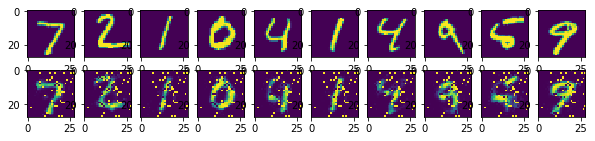

In [2]:
# MNIST 숫자 분류를 위한 Stacked AutoEncoder 예제


# 절대 임포트 설정
from __future__ import division, print_function, absolute_import

# 필요 라이브러리 임포트
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터 로드
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 파라미터 설정
learning_rate_RMSProp = 0.01
learning_rate_Gradient_Descent = 0.5
training_epochs = 40  # epoch 횟수 (iteration)
softmax_classifier_iterations = 1000 # Softmax Classifier iteration 횟수
batch_size = 256
display_step = 1       # 몇 스텝마다 log를 출력할지 결정한다.
examples_to_show = 10  # reconstruct된 이미지 중 몇개를 보여줄지를 결정한다. 
n_hidden_1 = 200       # 첫 번째 히든레이어의 노드 개수
n_hidden_2 = 200       # 두 번째 히든레이어의 노드 개수
n_input = 784          # MNIST 데이터 input (이미지 크기: 28*28)

# Stacked Autoencoder를 생성한다.
def build_autoencoder():
    # 히든 레이어 1을 위한 Weight와 Biases
    Wh_1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
    bh_1 = tf.Variable(tf.random_normal([n_hidden_1]))
    h_1 = tf.nn.sigmoid(tf.matmul(X, Wh_1) + bh_1)  # 히든레이어 1의 activation (sigmoid 함수를 사용)
    # 히든 레이어 2을 위한 Weights와 Biases
    Wh_2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
    bh_2 = tf.Variable(tf.random_normal([n_hidden_2]))
    h_2 = tf.nn.sigmoid(tf.matmul(h_1, Wh_2) + bh_2)   # 히든레이어 2의 activation (sigmoid 함수를 사용)
    # Output 레이어를 위한 Weights와 Biases
    Wo = tf.Variable(tf.random_normal([n_hidden_2, n_input]))
    bo = tf.Variable(tf.random_normal([n_input]))
    X_reconstructed = tf.nn.sigmoid(tf.matmul(h_2,Wo) + bo)   # Output 레이어의 activation (sigmoid 함수를 사용)
    return X_reconstructed, h_2
    
# Softmax Classifier를 생성한다. 히든 레이어에서 추출된 feature들이 어떻게 작동하는지 잘 구별하고 학습했는지 확인할 용도로 softmax_classifier를 build 한다. 
def build_softmax_classifier():
    # Softmax Classifier를 위한 파라미터들
    W = tf.Variable(tf.zeros([n_hidden_2, 10]))
    b = tf.Variable(tf.zeros([10]))
    y_pred = tf.nn.softmax(tf.matmul(extracted_features, W) + b)      # 예측된 Output : 두번째 히든레이어의 activation output을 input으로 사용한다. 
    return y_pred


# 학습에 필요한 변수들 설정
X = tf.placeholder("float", [None, n_input])    # Input 데이터 설정
y_pred, extracted_features = build_autoencoder() # Autoencoder의 Reconstruction 결과, 압축된 Features(h_2=200)
y_true = X # Output 값(True Output)을 설정(=Input 값)
y = build_softmax_classifier()                # Predicted Output using Softmax Classifier
y_ = tf.placeholder(tf.float32, [None, 10])   # True Output

# Optimization을 위한 파라미터들
# Autoencoder Optimization을 위한 파라미터들 
reconsturction_cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))     # squared error loss 함수
initial_optimizer = tf.train.RMSPropOptimizer(learning_rate_RMSProp).minimize(reconsturction_cost)

# Softmax Classifier Optimization을 위한 파라미터들 
cross_entropy_cost = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))     # cross-entropy loss 함수
softmax_classifier_optimizer = tf.train.GradientDescentOptimizer(learning_rate_Gradient_Descent).minimize(cross_entropy_cost)

# Fine Tuning Optimization을 위한 파라미터들
finetuning_cost = cross_entropy_cost + reconsturction_cost
finetuning_optimizer = tf.train.GradientDescentOptimizer(learning_rate_Gradient_Descent).minimize(finetuning_cost)



####### 모델 학습!!
with tf.Session() as sess:
    # 변수들을 초기화한다.
    sess.run(tf.global_variables_initializer())
    
    # Step 1: Stacked Autoencoder pre-training 
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training을 시작한다.
    for epoch in range(training_epochs):
        # 모든 배치들을 돌아가면서(Loop) 학습한다.
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # batch 데이터를 이용해서 트레이닝을 진행한다.
            _, cost_value = sess.run([initial_optimizer, reconsturction_cost], feed_dict={X: batch_xs})
        # 일정 epoch step마다 로그를 출력한다.
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost_value))
    print("Stacked Autoencoder pre-training Optimization Finished!")


    # Step 2: test 데이터셋을 autoencoder로 reconstruction 해본다.
    reconstructed_image = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # 원본 이미지와 재구축(reconstructed)된 이미지를 비교한다.
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed_image[i], (28, 28)))
    f.show()
    plt.draw()
    #plt.waitforbuttonpress()     # 버튼을 누를때까지 작업 정지 
    f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장한다.


    # Step 3: Softmax Classifier를 학습한다.
    for i in range(softmax_classifier_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(100)     
      sess.run(softmax_classifier_optimizer, feed_dict={X: batch_xs, y_: batch_ys})  
    print("Softmax Classifier Optimization Finished!")


    # Step 4: 학습된 모델이 얼마나 정확한지를 출력한다. (Before fine-tuning) 
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy(before fine-tuning): ")   # Accuracy ~ 0.9282
    print(sess.run(accuracy, feed_dict={X: mnist.test.images, y_: mnist.test.labels}))


    # Step 5: Fine-tuning softmax model
    # Training을 시작한다.
    for epoch in range(training_epochs):
       # 모든 배치들을 돌아가면서(Loop) 학습한다.
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # batch 데이터를 이용해서 트레이닝을 진행한다.
            _, cost_value = sess.run([finetuning_optimizer, finetuning_cost], feed_dict={X: batch_xs,  y_: batch_ys})
        # 일정 epoch step마다 로그를 출력한다.
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost_value))
    print("Fine-tuning softmax model Optimization Finished!")


    # Step 6: 학습된 모델이 얼마나 정확한지를 출력한다. (After fine-tuning) 
    print("Accuracy(after fine-tuning): ")      # Accuracy ~ 0.9714
    print(sess.run(accuracy, feed_dict={X: mnist.test.images, y_: mnist.test.labels}))




    
    
    
    